# Exploratory Data Analysis for Crypto Market

This notebook present an EDA for the Historical Cryptocurrencies Market, based on the public dataset [Historical Cryptocurrencies Market](https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory). We will address some of the next questions:

* Cryptocurrencies behavior in the time.
* Look for outliers in the time (sudden spikes or drops in price)
* Descriptive statistics in different time periods and what the told us.
* Which cryptocurrencies are more representative and why.
* Which cryptocurrencies are older and more recent.
* Measure the volatility of each one.
* Correlation between cryptocurrencies.
* Dataset limitations and future work.

This work is done by: 

* Manuel Alejandro Aponte Ramirez
* Martin Eduardo
* Ivan Cruz
 

https://www.coingecko.com/en/coins/bitcoin/historical_data?start=2000-01-12&end=2024-01-02
https://coincodex.com/crypto/bitcoin/historical-data/
https://www.tradingview.com/markets/cryptocurrencies/prices-all/
https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory

## Import packages

In [5]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data Understanding
### Collect data

* Load dataset of the creation date of each cryptocurrency

In [63]:
crypto_creation = {
    'Name': ['Aave', 'Binance Coin', 'Bitcoin', 'Cardano', 'Chainlink', 'Cosmos', 'Crypto.com Coin', 
              'Dogecoin', 'EOS', 'Ethereum', 'IOTA', 'Litecoin', 'Monero', 'NEM', 'Polkadot', 'Solana', 
              'Stellar', 'TRON', 'Tether', 'USD Coin', 'Uniswap', 'Wrapped Bitcoin', 'XRP'],
    'Date': ['2020-01-08', '2017-07-25', '2009-01-03', '2017-09-29', '2017-09-19', '2017-03-14', 
             '2016-11-14', '2013-12-06', '2018-06-01', '2015-07-30', '2015-06-11', '2011-10-07', 
             '2014-04-18', '2015-03-31', '2020-05-26', '2020-03-24', '2014-07-31', '2017-09-26', 
             '2014-10-06', '2018-09-26', '2018-11-02', '2019-01-30', '2012-08-02']
}

crypto_creation_df = pd.DataFrame(crypto_creation)
crypto_creation_df['Date'] = pd.to_datetime(crypto_creation_df['Date'])
crypto_creation_df.head()

,Name,Date
0,Aave,2020-01-08
1,Binance Coin,2017-07-25
2,Bitcoin,2009-01-03
3,Cardano,2017-09-29
4,Chainlink,2017-09-19


* Load cryptocurrencies historical prices

In [64]:
filenames = [files for root, dirs, files in os.walk("data/")][0]
df = pd.concat([pd.read_csv(f"data/{file}") for file in filenames]) 

### Data integrity

The data has full integrity. There are not null values

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37082 entries, 0 to 2892
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        37082 non-null  int64  
 1   Name       37082 non-null  object 
 2   Symbol     37082 non-null  object 
 3   Date       37082 non-null  object 
 4   High       37082 non-null  float64
 5   Low        37082 non-null  float64
 6   Open       37082 non-null  float64
 7   Close      37082 non-null  float64
 8   Volume     37082 non-null  float64
 9   Marketcap  37082 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


### Inspect Data

In [66]:
df.sample(5)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Polkadot,DOT,2020-08-21 23:59:59,3.090093,2.730919,2.896923,2.875028,4.931314e+07,0.000000e+00
312,313,Crypto.com Coin,CRO,2019-10-23 23:59:59,0.033848,0.031274,0.033622,0.031741,1.351660e+07,3.511760e+08
884,885,Binance Coin,BNB,2019-12-27 23:59:59,13.439774,13.123028,13.208636,13.362720,1.644134e+08,2.078393e+09
781,782,Wrapped Bitcoin,WBTC,2021-03-22 23:59:59,58261.672512,54320.492931,57521.196125,54507.570472,1.030276e+08,7.489495e+09
809,810,IOTA,MIOTA,2019-09-01 23:59:59,0.250578,0.239184,0.247385,0.241587,5.111188e+06,6.714992e+08


* Variables description

**Date** : date of observation

**Open** : Opening price on the given day

**High** : Highest price on the given day

**Low** : Lowest price on the given day

**Close** : Closing price on the given day

**Volume** : Volume of transactions on the given day

**Market Cap** : Market capitalization in USD


In [67]:
df.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,37082.000000,37082.000000,37082.000000,37082.000000,37082.000000,3.708200e+04,3.708200e+04
mean,1056.699018,1016.058015,952.987707,985.323755,987.120511,3.022542e+09,1.542943e+10
std,755.992373,5249.503670,4907.932082,5088.101367,5093.703878,1.190963e+10,7.059128e+10
min,1.000000,0.000089,0.000079,0.000086,0.000086,0.000000e+00,0.000000e+00
25%,420.000000,0.075664,0.069536,0.072456,0.072648,4.937190e+06,2.395955e+08
50%,910.000000,1.008733,0.999850,1.001157,1.001138,8.512805e+07,1.405335e+09
75%,1585.000000,31.916399,28.996246,30.459673,30.512205,9.388489e+08,5.159305e+09
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


* The min and max value vary between 0 and large number because in the beginning of cryptocurrencies their price was near to nothing and in other moments of time their price and popularity exploded.
* Because Volume and Marketcap have very large values, we will scale theses values later for easier understanding

### Data Wrangle 

* Cast to correct data types
* Scale volume and Marketcap variables

In [68]:
df['Date'] = pd.to_datetime(df['Date'])
df['volume_billion'] = df['Volume'] / 1_000_000_000
df['marketcap_billion'] = df['Marketcap'] / 1_000_000_000

* Calculate the rolling standard deviation

Because the cryptocurrencies prices are time series, and their are very know for their volatilities. It's likely that they show heteroscedasticity, we will to measure it using a month and a year window. 


In [69]:
df['std_rolling_month'] = df['High'].rolling(window=30).std()
df['std_rolling_year'] = df['High'].rolling(window=365).std()

## EDA

**Assumptions**
  - We assume the dataset contains correct values
  - We assume the dataset contains the most representative cryptocurrencies.

-------------------------


**How many cryptocurrencies does contain the dataset and how many are missing?**

In [70]:
df.Name.unique()

array(['Aave', 'Binance Coin', 'Bitcoin', 'Cardano', 'Chainlink',
       'Cosmos', 'Crypto.com Coin', 'Dogecoin', 'EOS', 'Ethereum', 'IOTA',
       'Litecoin', 'Monero', 'NEM', 'Polkadot', 'Solana', 'Stellar',
       'Tether', 'TRON', 'Uniswap', 'USD Coin', 'Wrapped Bitcoin', 'XRP'],
      dtype=object)

In [71]:
df.Name.nunique()

23

According with [Forbes](https://www.forbes.com/advisor/au/investing/cryptocurrency/different-types-of-cryptocurrencies-explained/#:~:text=As%20of%20June%202023%2C%20there,in%20the%20digital%20asset%20ecosystem.) in 2023 exist at least 25.994 cryptocurrencies

In [72]:
f'{23*100/25994:.3f}'

'0.088'

That means that the dataset contain less than 0.088% of all currencies

**Based on the available cryptocurrencies in the dataset, how many temporal information are lost?**

* Calculate the first date since each cryptocurrency was registered in dataset

In [73]:
min_date_df = df.groupby(["Name"])["Date"].min().reset_index()
min_date_df = min_date_df.merge(crypto_creation_df, on='Name', suffixes=['_dataset','_creation'])
min_date_df

,Name,Date_dataset,Date_creation
0,Aave,2020-10-05 23:59:59,2020-01-08
1,Binance Coin,2017-07-26 23:59:59,2017-07-25
2,Bitcoin,2013-04-29 23:59:59,2009-01-03
3,Cardano,2017-10-02 23:59:59,2017-09-29
4,Chainlink,2017-09-21 23:59:59,2017-09-19
5,Cosmos,2019-03-15 23:59:59,2017-03-14
6,Crypto.com Coin,2018-12-15 23:59:59,2016-11-14
7,Dogecoin,2013-12-16 23:59:59,2013-12-06
8,EOS,2017-07-02 23:59:59,2018-06-01
9,Ethereum,2015-08-08 23:59:59,2015-07-30


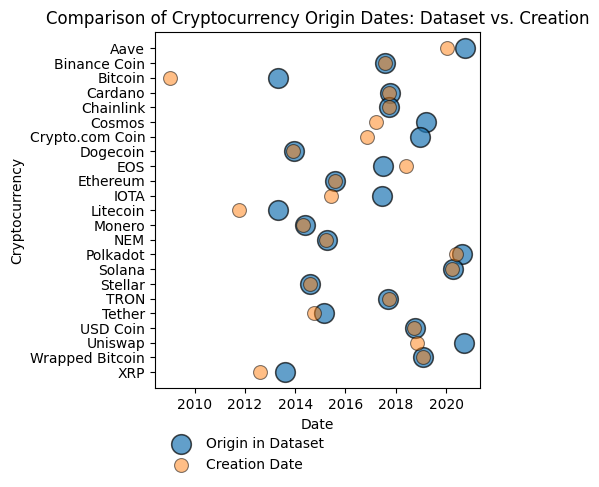

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the plot for better visibility
plt.figure(figsize=[5,5])

# Scatter plot for the origin in the dataset
sns.scatterplot(data=min_date_df, x='Date_dataset', y='Name', s=200, marker='o', edgecolor='black', alpha=0.7, label="Origin in Dataset")

# Scatter plot for the creation date
sns.scatterplot(data=min_date_df, x='Date_creation', y='Name', s=100, marker='o', edgecolor='black', alpha=0.5, label="Creation Date")

# Enhancing legend and plot aesthetics
plt.legend(bbox_to_anchor=(0, -0.1), loc='upper left', frameon=False)

# Adding labels and title
plt.xlabel('Date')  # X-axis label
plt.ylabel('Cryptocurrency')  # Y-axis label
plt.title('Comparison of Cryptocurrency Origin Dates: Dataset vs. Creation')  # Plot title

# Adjust layout to make room for the legend and ensure nothing is cut off
plt.tight_layout()

# Show the plot
plt.show()


In [75]:
last_day_results = df[df.Date == df.Date.max()]

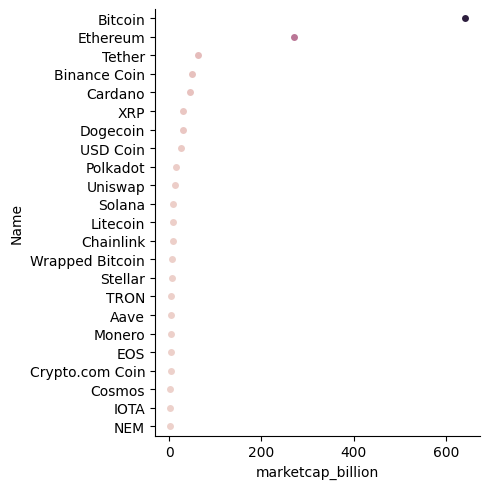

In [79]:
sns.catplot(last_day_results.sort_values(by="marketcap_billion", ascending=False), y="Name", x="marketcap_billion", hue="marketcap_billion", legend=False, errorbar=None, )


<Axes: xlabel='volume_billion', ylabel='Name'>

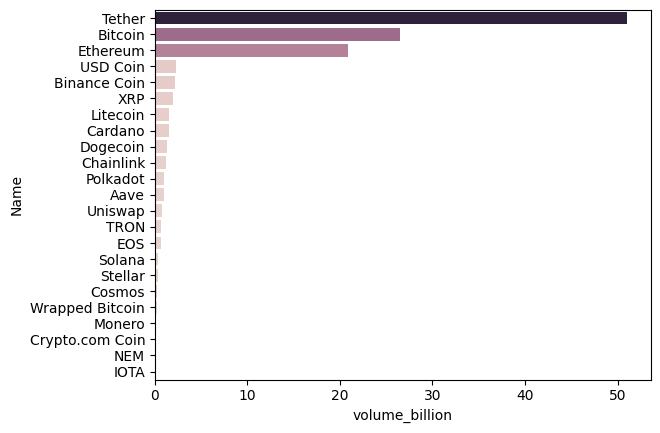

In [192]:
sns.barplot(last_day_results.sort_values(by="volume_billion", ascending=False), y="Name", x="volume_billion", hue="volume_billion", legend=False, errorbar=None, )


* Revisar stable coin vs traditional cryptos

In [193]:
top_5_cryptos_names = df.groupby("Name").max().reset_index().sort_values("marketcap_billion", ascending=False)[:5]["Name"].to_list()
top_5_cryptos_names

['Bitcoin', 'Ethereum', 'XRP', 'Binance Coin', 'Dogecoin']

In [194]:
top_5_cryptos_df = df[df.Name.isin(top_5_cryptos_names)]

In [195]:
top_5_cryptos_df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,volume_billion,marketcap_billion,std_rolling_month,std_rolling_year
0,1,Binance Coin,BNB,2017-07-26 23:59:59,0.109013,0.099266,0.105893,0.105138,2.003950e+05,1.051380e+07,0.000200,0.010514,68.445164,NaN
1,2,Binance Coin,BNB,2017-07-27 23:59:59,0.108479,0.100888,0.105108,0.107737,3.444990e+05,1.077370e+07,0.000344,0.010774,82.902720,NaN
2,3,Binance Coin,BNB,2017-07-28 23:59:59,0.109019,0.101473,0.107632,0.104067,3.425680e+05,1.040670e+07,0.000343,0.010407,93.668224,NaN
3,4,Binance Coin,BNB,2017-07-29 23:59:59,0.111264,0.101108,0.104782,0.107811,3.402180e+05,1.078110e+07,0.000340,0.010781,102.117854,NaN
4,5,Binance Coin,BNB,2017-07-30 23:59:59,0.108138,0.103162,0.107935,0.106414,2.242610e+05,1.064140e+07,0.000224,0.010641,109.504207,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2888,2889,XRP,XRP,2021-07-02 23:59:59,0.667287,0.634726,0.659890,0.656763,2.061607e+09,3.030759e+10,2.061607,30.307589,0.129601,0.421801
2889,2890,XRP,XRP,2021-07-03 23:59:59,0.683677,0.644653,0.655639,0.672888,1.872820e+09,3.105172e+10,1.872820,31.051722,0.122352,0.421344
2890,2891,XRP,XRP,2021-07-04 23:59:59,0.707783,0.665802,0.673218,0.694945,1.885242e+09,3.206960e+10,1.885242,32.069596,0.115012,0.420904
2891,2892,XRP,XRP,2021-07-05 23:59:59,0.695653,0.648492,0.695653,0.654300,2.076373e+09,3.019395e+10,2.076373,30.193952,0.109838,0.420447


<Axes: xlabel='Date', ylabel='marketcap_billion'>

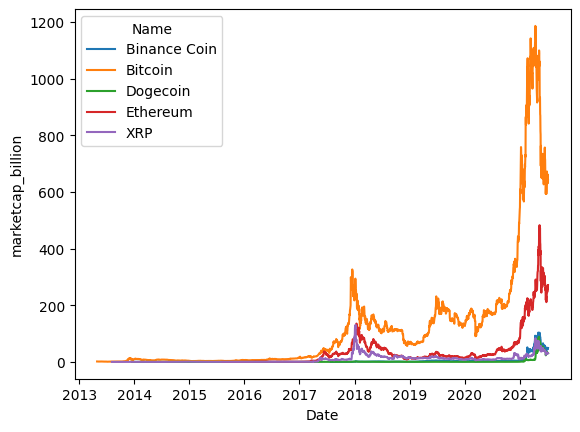

In [196]:
sns.lineplot(data=top_5_cryptos_df, x="Date", y="marketcap_billion", hue="Name")

In [197]:
top_5_cryptos_df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,volume_billion,marketcap_billion,std_rolling_month,std_rolling_year
0,1,Binance Coin,BNB,2017-07-26 23:59:59,0.109013,0.099266,0.105893,0.105138,2.003950e+05,1.051380e+07,0.000200,0.010514,68.445164,NaN
1,2,Binance Coin,BNB,2017-07-27 23:59:59,0.108479,0.100888,0.105108,0.107737,3.444990e+05,1.077370e+07,0.000344,0.010774,82.902720,NaN
2,3,Binance Coin,BNB,2017-07-28 23:59:59,0.109019,0.101473,0.107632,0.104067,3.425680e+05,1.040670e+07,0.000343,0.010407,93.668224,NaN
3,4,Binance Coin,BNB,2017-07-29 23:59:59,0.111264,0.101108,0.104782,0.107811,3.402180e+05,1.078110e+07,0.000340,0.010781,102.117854,NaN
4,5,Binance Coin,BNB,2017-07-30 23:59:59,0.108138,0.103162,0.107935,0.106414,2.242610e+05,1.064140e+07,0.000224,0.010641,109.504207,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2888,2889,XRP,XRP,2021-07-02 23:59:59,0.667287,0.634726,0.659890,0.656763,2.061607e+09,3.030759e+10,2.061607,30.307589,0.129601,0.421801
2889,2890,XRP,XRP,2021-07-03 23:59:59,0.683677,0.644653,0.655639,0.672888,1.872820e+09,3.105172e+10,1.872820,31.051722,0.122352,0.421344
2890,2891,XRP,XRP,2021-07-04 23:59:59,0.707783,0.665802,0.673218,0.694945,1.885242e+09,3.206960e+10,1.885242,32.069596,0.115012,0.420904
2891,2892,XRP,XRP,2021-07-05 23:59:59,0.695653,0.648492,0.695653,0.654300,2.076373e+09,3.019395e+10,2.076373,30.193952,0.109838,0.420447


In [198]:
pivot_cryptos = top_5_cryptos_df.groupby(['Date', 'Name'])['Close'].last().unstack()


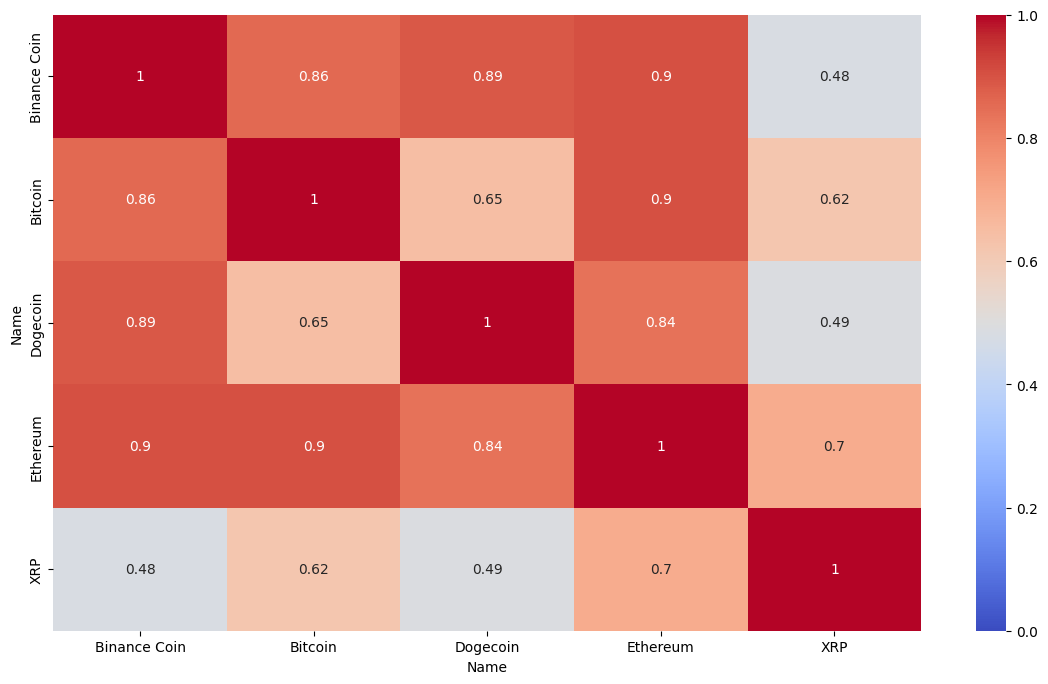

In [199]:
plt.figure(figsize=(14,8))
sns.heatmap(pivot_cryptos.corr(),vmin=0, vmax=1, cmap='coolwarm', annot=True);

In [200]:
df['relative_difference'] = ((df["Close"] - df["Open"]) / df["Open"]) * 100
df['abs_relative_difference'] = np.abs(df['relative_difference'])

In [201]:
df.groupby("Name")[['abs_relative_difference','relative_difference']].mean().reset_index().sort_values("abs_relative_difference", ascending=False)

,Name,abs_relative_difference,relative_difference
15,Solana,6.896017,1.225884
20,Uniswap,6.878385,1.128164
0,Aave,6.619790,1.049360
14,Polkadot,5.725684,0.860626
4,Chainlink,5.531447,0.627831
17,TRON,5.205080,0.616453
13,NEM,5.147485,0.583397
5,Cosmos,5.019323,0.350266
10,IOTA,4.945000,0.281650
3,Cardano,4.873700,0.597083


<Axes: xlabel='Date', ylabel='Close'>

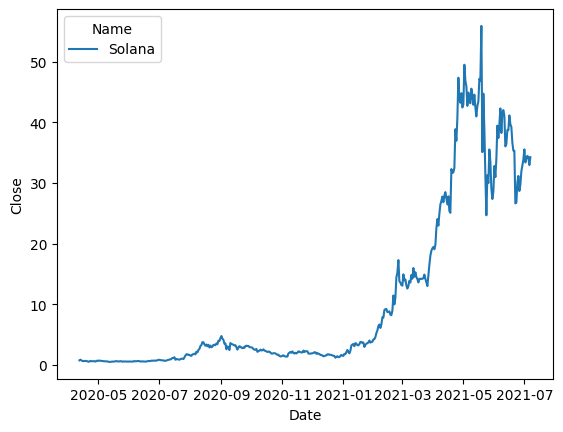

In [202]:
sns.lineplot(data=df[df.Name == "Solana"], x="Date", y="Close", hue="Name")

<Axes: xlabel='Date', ylabel='relative_difference'>

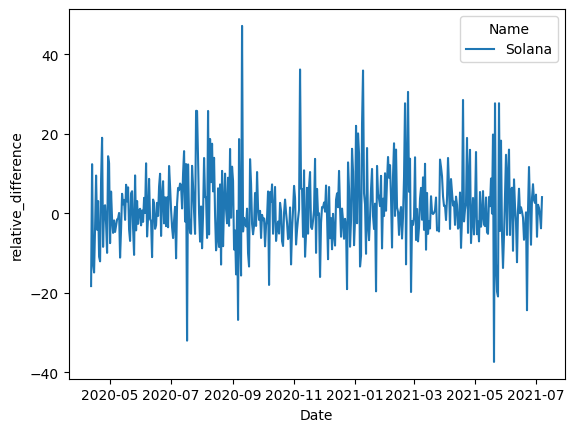

In [203]:
sns.lineplot(data=df[df.Name == "Solana"], x="Date", y="relative_difference", hue="Name")

<Axes: xlabel='Date', ylabel='Close'>

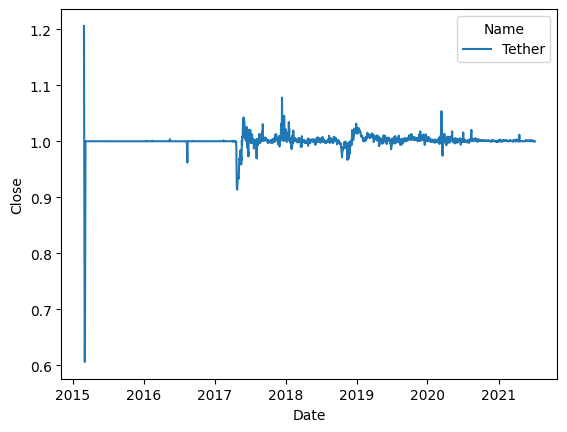

In [204]:
sns.lineplot(data=df[df.Name == "Tether"], x="Date", y="Close", hue="Name")

<Axes: xlabel='Date', ylabel='relative_difference'>

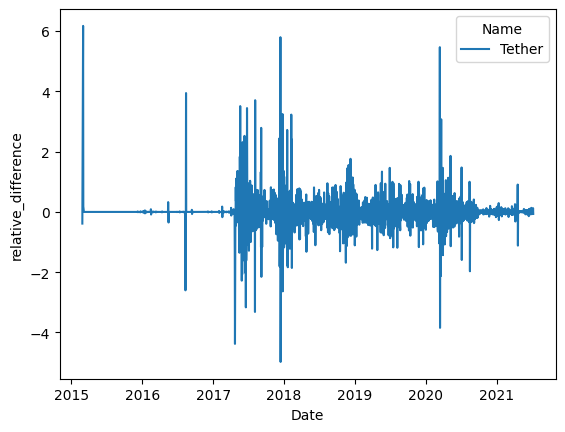

In [205]:
sns.lineplot(data=df[df.Name == "Tether"], x="Date", y="relative_difference", hue="Name")

* Averiguar tiempo de decadencia

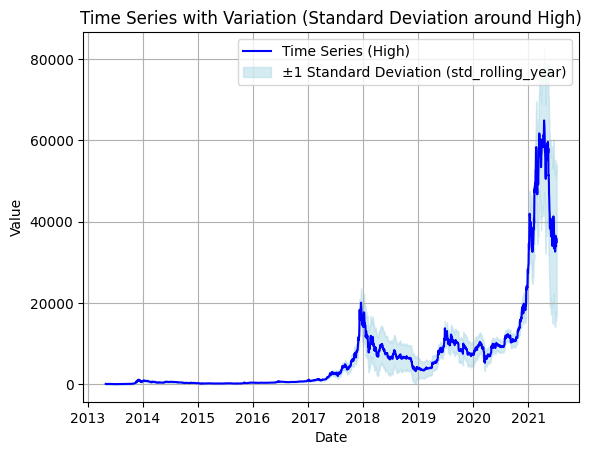

In [209]:
# Assuming `df` is your DataFrame containing the columns 'High' and 'std_rolling_year'
# Plotting
bitcoin = df[df.Name == "Bitcoin"]

plt.plot(bitcoin['Date'], bitcoin['High'], label='Time Series (High)', color='blue')
plt.fill_between(bitcoin['Date'], bitcoin['High'] - bitcoin['std_rolling_year'], bitcoin['High'] + bitcoin['std_rolling_year'], 
                 color='lightblue', alpha=0.5, label='±1 Standard Deviation (std_rolling_year)')
plt.title('Time Series with Variation (Standard Deviation around High)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


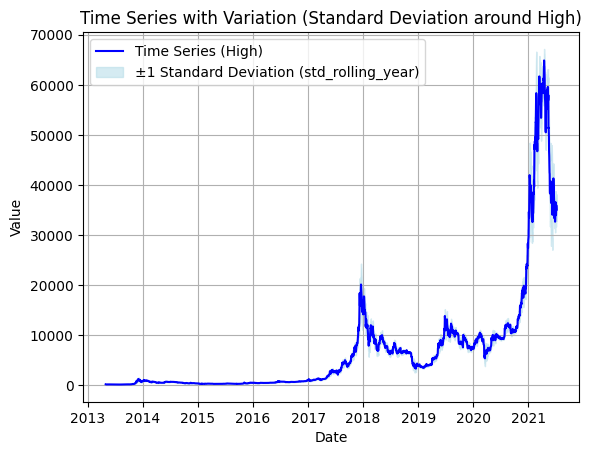

In [210]:
# Assuming `df` is your DataFrame containing the columns 'High' and 'std_rolling_year'
# Plotting
bitcoin = df[df.Name == "Bitcoin"]

plt.plot(bitcoin['Date'], bitcoin['High'], label='Time Series (High)', color='blue')
plt.fill_between(bitcoin['Date'], bitcoin['High'] - bitcoin['std_rolling_month'], bitcoin['High'] + bitcoin['std_rolling_month'], 
                 color='lightblue', alpha=0.5, label='±1 Standard Deviation (std_rolling_year)')
plt.title('Time Series with Variation (Standard Deviation around High)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()
